In [4]:
!pip install rmsprop

ERROR: Could not find a version that satisfies the requirement rmsprop (from versions: none)
ERROR: No matching distribution found for rmsprop


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [9]:
#changing the working directory
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [12]:
pwd

'/content/drive/My Drive/Kaggle'

In [13]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

100% 428M/429M [00:09<00:00, 46.9MB/s]
100% 429M/429M [00:09<00:00, 47.6MB/s]


In [15]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # to use operating system dependent functionality
import librosa # to extract speech features
import wave # read and write WAV files
import matplotlib.pyplot as plt # to generate the visualizations

# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# LSTM Classifier
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [7]:
def extract_mfcc(wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path_to_wav_file
    #Output: mfcc_features'''
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [26]:
##### load radvess speech data #####
radvess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file
for dirname, _, filenames in os.walk('/content/drive/My Drive/Kaggle/Audio'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        radvess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name)) # extract MFCC features/file
        
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [28]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions

#### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
ravdess_speech_data_array.shape
labels_categorical.shape

(1440, 8)

In [42]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.30, random_state=9)

In [43]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)


In [44]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [45]:
# Predict for the test set
y_pred=model.predict(x_test)

In [46]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 27.78%


LSTM

In [47]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [48]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [53]:
## train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=100, shuffle=True)

Epoch 1/100
36/36 [==============================] - 2s 45ms/step - loss: 2.0831 - accuracy: 0.1380 - val_loss: 2.0714 - val_accuracy: 0.1181
Epoch 2/100
36/36 [==============================] - 1s 31ms/step - loss: 2.0565 - accuracy: 0.1597 - val_loss: 2.0503 - val_accuracy: 0.1944
Epoch 3/100
36/36 [==============================] - 1s 32ms/step - loss: 2.0281 - accuracy: 0.1806 - val_loss: 1.9975 - val_accuracy: 0.1944
Epoch 4/100
36/36 [==============================] - 1s 31ms/step - loss: 1.9989 - accuracy: 0.2101 - val_loss: 2.0146 - val_accuracy: 0.1458
Epoch 5/100
36/36 [==============================] - 1s 32ms/step - loss: 1.9837 - accuracy: 0.2049 - val_loss: 1.9663 - val_accuracy: 0.1806
Epoch 6/100
36/36 [==============================] - 1s 32ms/step - loss: 1.9651 - accuracy: 0.2135 - val_loss: 1.9722 - val_accuracy: 0.1875
Epoch 7/100
36/36 [==============================] - 1s 31ms/step - loss: 1.9471 - accuracy: 0.2127 - val_loss: 1.9376 - val_accuracy: 0.2014
Epoch 

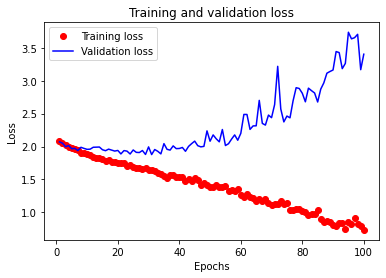

In [54]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

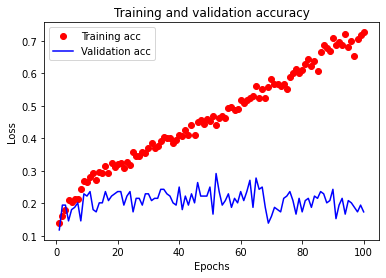

In [55]:
### accuracy plots using LSTM model
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [56]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

5/5 [==============================] - 0s 9ms/step - loss: 2.9417 - accuracy: 0.3611


[2.9417450428009033, 0.3611111044883728]

In [57]:
def create_model_GRU():
    model = Sequential()
    model.add(GRU(256, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [58]:
### train using LSTM model
model_B = create_model_GRU()
history = model_B.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=100, shuffle=True)

Epoch 1/100
36/36 [==============================] - 3s 83ms/step - loss: 2.0853 - accuracy: 0.1502 - val_loss: 2.0698 - val_accuracy: 0.1250
Epoch 2/100
36/36 [==============================] - 3s 70ms/step - loss: 2.0706 - accuracy: 0.1424 - val_loss: 2.0582 - val_accuracy: 0.1458
Epoch 3/100
36/36 [==============================] - 3s 71ms/step - loss: 2.0537 - accuracy: 0.1458 - val_loss: 2.0413 - val_accuracy: 0.1528
Epoch 4/100
36/36 [==============================] - 3s 71ms/step - loss: 2.0355 - accuracy: 0.1658 - val_loss: 2.0229 - val_accuracy: 0.1319
Epoch 5/100
36/36 [==============================] - 3s 71ms/step - loss: 2.0195 - accuracy: 0.1849 - val_loss: 1.9985 - val_accuracy: 0.1806
Epoch 6/100
36/36 [==============================] - 3s 70ms/step - loss: 1.9918 - accuracy: 0.2005 - val_loss: 2.0289 - val_accuracy: 0.1458
Epoch 7/100
36/36 [==============================] - 3s 72ms/step - loss: 1.9829 - accuracy: 0.2040 - val_loss: 2.0153 - val_accuracy: 0.1389
Epoch 

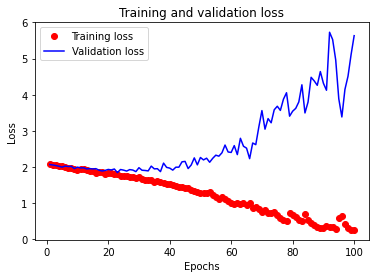

In [64]:
### loss plots using GRU model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

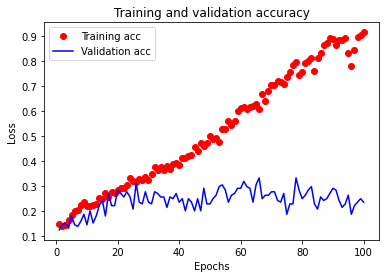

In [63]:
### accuracy plots using GRU model
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [65]:
### evaluate using model B
model_B.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

5/5 [==============================] - 0s 19ms/step - loss: 4.6724 - accuracy: 0.3125


[4.672386646270752, 0.3125]